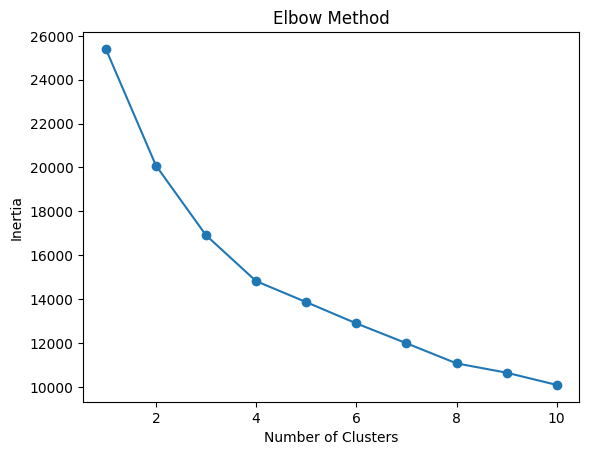

     SALES  QUANTITYORDERED  PRICEEACH  Cluster
0  2871.00               30      95.70        1
1  2765.90               34      81.35        2
2  3884.34               41      94.74        1
3  3746.70               45      83.26        1
4  5205.27               49     100.00        1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Load dataset
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\downloads\sales_data_sample.csv", encoding='latin1')

# 2. Select numeric columns only
data = df.select_dtypes(include='number').dropna()

# 3. Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(data)

# 4. Elbow Method to find optimal clusters
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# 5. Apply K-Means (example: k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print(df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'Cluster']].head())
